In [1]:
import pandas
import numpy
import gdal
import georasters as gr
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
from sklearn import preprocessing

In [2]:
thorium = gr.from_file("LP_GRS_Th_Global_2ppd.tif").to_pandas()
iron = gr.from_file("LP_GRS_Fe_Global_2ppd.tif").to_pandas()
helium = gr.from_file("LP_GRS_H_Global_2ppd.tif").to_pandas()

thorium_values = thorium['value']
thorium_values.name = 'Th'
iron_values = iron['value']
iron_values.name = 'Fe'
helium_values = helium['value']
helium_values.name = 'H'
print("Shape of TH ", thorium.shape)
print("Shape of FE ", iron.shape)
print("Shape of H ", helium.shape)

Shape of TH  (259200, 5)
Shape of FE  (259200, 5)
Shape of H  (259200, 5)


In [3]:
#print(numpy.corrcoef(x=thorium_values, y=iron_values, rowvar= False))

In [4]:
elements_dataframe = pandas.concat([thorium_values, iron_values, helium_values], axis=1)

In [5]:
print(elements_dataframe.corr())

          Th        Fe         H
Th  1.000000  0.748271  0.039447
Fe  0.748271  1.000000 -0.033953
H   0.039447 -0.033953  1.000000


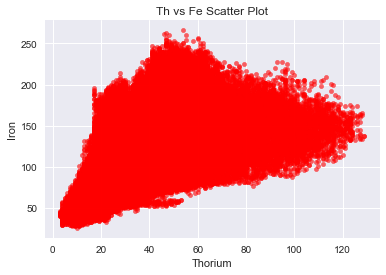

In [6]:
elements_dataframe.plot(kind = 'scatter', x ='Th', y='Fe', alpha = .6, color = 'red')
plt.xlabel('Thorium')
plt.ylabel('Iron')
plt.title('Th vs Fe Scatter Plot')
plt.show()

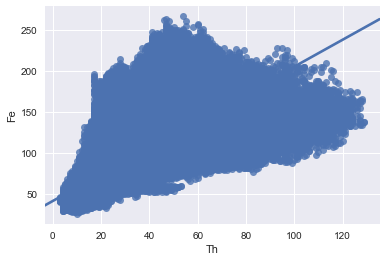

In [7]:
sns.regplot(x="Th", y="Fe", data=elements_dataframe);

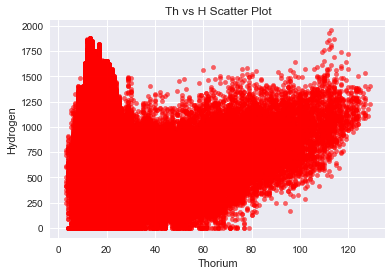

In [8]:
elements_dataframe.plot(kind = 'scatter', x ='Th', y='H', alpha = .6, color = 'red')
plt.xlabel('Thorium')
plt.ylabel('Hydrogen')
plt.title('Th vs H Scatter Plot')
plt.show()

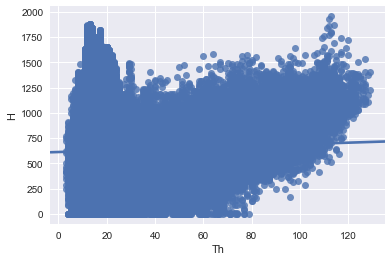

In [9]:
sns.regplot(x="Th", y="H", data=elements_dataframe);

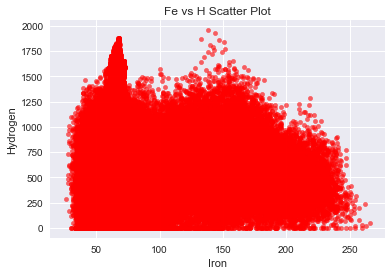

In [10]:
elements_dataframe.plot(kind = 'scatter', x ='Fe', y='H', alpha = .6, color = 'red')
plt.xlabel('Iron')
plt.ylabel('Hydrogen')
plt.title('Fe vs H Scatter Plot')
plt.show()

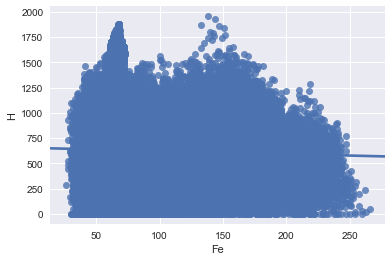

In [11]:
sns.regplot(x="Fe", y="H", data=elements_dataframe);

In [12]:
print(elements_dataframe.corr().describe())

             Th        Fe         H
count  3.000000  3.000000  3.000000
mean   0.595906  0.571440  0.335165
std    0.498073  0.539181  0.576933
min    0.039447 -0.033953 -0.033953
25%    0.393859  0.357159  0.002747
50%    0.748271  0.748271  0.039447
75%    0.874136  0.874136  0.519724
max    1.000000  1.000000  1.000000


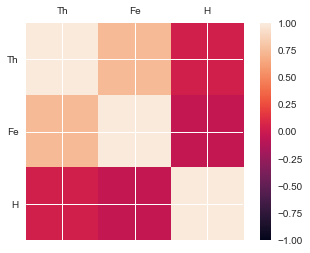

In [13]:
correlations = elements_dataframe.corr()

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)

ticks = numpy.arange(0,3,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(elements_dataframe.columns)
ax.set_yticklabels(elements_dataframe.columns)
plt.show()

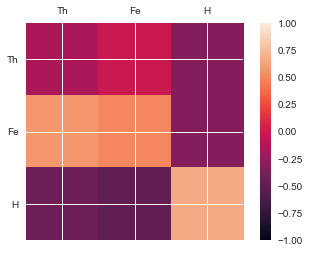

In [14]:
covariance = elements_dataframe.cov()
df_norm = (covariance - covariance.mean()) / (covariance.max() - covariance.min())
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(df_norm, vmin=-1, vmax=1)
fig.colorbar(cax)

ticks = numpy.arange(0,3,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(elements_dataframe.columns)
ax.set_yticklabels(elements_dataframe.columns)
plt.show()

In [15]:
x = covariance.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
normalized = pandas.DataFrame(x_scaled)
print(normalized)

          0         1       2
0  0.267158  0.495866  0.0058
1  1.000000  1.000000  0.0000
2  0.000000  0.000000  1.0000


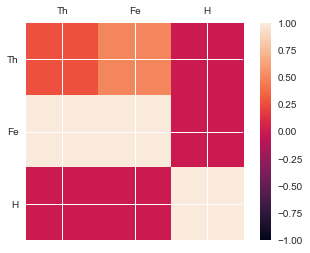

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(normalized, vmin=-1, vmax=1)
fig.colorbar(cax)

ticks = numpy.arange(0,3,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(elements_dataframe.columns)
ax.set_yticklabels(elements_dataframe.columns)
plt.show()

In [17]:
print(df_norm)

          Th        Fe         H
Th -0.155228 -0.002756 -0.329467
Fe  0.577614  0.501378 -0.335267
H  -0.422386 -0.498622  0.664733


In [18]:
# print(elements_dataframe.corr())
thorium.head()

,row,col,value,x,y
0,0,0,17,-5.458203e+06,2729101.54
1,0,1,17,-5.443041e+06,2729101.54
2,0,2,17,-5.427880e+06,2729101.54
3,0,3,17,-5.412718e+06,2729101.54
4,0,4,17,-5.397556e+06,2729101.54


In [19]:


elements_dataframe.head()

,Th,Fe,H
0,17,71,1555
1,17,71,1555
2,17,71,1555
3,17,71,1555
4,17,71,1556


In [20]:
thorium.head()

,row,col,value,x,y
0,0,0,17,-5.458203e+06,2729101.54
1,0,1,17,-5.443041e+06,2729101.54
2,0,2,17,-5.427880e+06,2729101.54
3,0,3,17,-5.412718e+06,2729101.54
4,0,4,17,-5.397556e+06,2729101.54


In [21]:
helium.head()

,row,col,value,x,y
0,0,0,1555,-5.458203e+06,2729101.54
1,0,1,1555,-5.443041e+06,2729101.54
2,0,2,1555,-5.427880e+06,2729101.54
3,0,3,1555,-5.412718e+06,2729101.54
4,0,4,1556,-5.397556e+06,2729101.54


In [22]:
helium.x[0]

-5458203.0800000001

In [23]:
helium.x[259199]

5443041.3887999989

In [24]:
print(elements_dataframe)

        Th  Fe     H
0       17  71  1555
1       17  71  1555
2       17  71  1555
3       17  71  1555
4       17  71  1556
5       17  71  1556
6       17  71  1556
7       17  71  1556
8       17  71  1556
9       17  71  1556
10      17  71  1556
11      17  71  1556
12      17  71  1556
13      17  71  1556
14      17  71  1556
15      17  71  1556
16      17  71  1556
17      17  71  1556
18      17  71  1556
19      17  71  1556
20      17  71  1557
21      17  71  1557
22      17  71  1557
23      17  71  1557
24      17  71  1557
25      17  71  1557
26      17  71  1557
27      17  71  1557
28      17  71  1557
29      17  71  1557
...     ..  ..   ...
259170  17  64  1477
259171  17  64  1477
259172  17  64  1477
259173  17  64  1476
259174  17  64  1476
259175  17  64  1476
259176  17  64  1476
259177  17  64  1476
259178  17  64  1476
259179  17  64  1476
259180  17  64  1476
259181  17  64  1476
259182  17  64  1476
259183  17  64  1476
259184  17  64  1476
259185  17  6

In [25]:
resizedLola = gr.from_file("resizedLOLA.xyz").to_pandas()

In [26]:
resizedLola[(resizedLola.x == -10) & (resizedLola.y == -4)]

,row,col,value,x,y
135700,188,340,-1047.0,-10.0,-4.0


In [27]:
resizedLola.describe()

,row,col,value,x,y
count,259200.000000,259200.000000,259200.000000,259200.000000,259200.000000
mean,179.500000,359.500000,-519.058838,-0.250000,0.250000
std,103.922848,207.846297,2207.438477,103.923149,51.961424
min,0.000000,0.000000,-8542.500000,-180.000000,-89.500000
25%,89.750000,179.750000,-1909.500000,-90.125000,-44.625000
50%,179.500000,359.500000,-794.500000,-0.250000,0.250000
75%,269.250000,539.250000,633.500000,89.625000,45.125000
max,359.000000,719.000000,10176.500000,179.500000,90.000000


In [28]:
from pyproj import Proj, transform
def convertToLatLong(coordX, coordY):
    inProj = Proj(init='epsg:32662')
    outProj = Proj(init='epsg:4326')
    return transform(inProj,outProj,coordX,coordY)

test = thorium.copy()
test['Latitude', 'Longitude'] = test.apply(lambda x: convertToLatLong(x['x']*3.67109, x['y']*3.67109), axis = 1)

In [32]:
print(test.shape)
print(thorium.shape)

(259200, 6)
(259200, 5)


In [39]:
test.dtypes

row                        int64
col                        int64
value                     uint16
x                        float64
y                        float64
(Latitude, Longitude)     object
Lat                      float64
Long                     float64
dtype: object

In [37]:
test[['Lat','Long']] = test[test.columns[5]].apply(pandas.Series)

In [42]:
lola_latlong = test[['Lat', 'Long', 'value']].copy()

In [50]:
lola_latlong.Lat = lola_latlong.Lat.round()
lola_latlong.Long = lola_latlong.Long.round()

print(lola_latlong)

          Lat  Long  value
0       180.0  90.0     17
1      -180.0  90.0     17
2      -179.0  90.0     17
3      -179.0  90.0     17
4      -178.0  90.0     17
5      -178.0  90.0     17
6      -177.0  90.0     17
7      -177.0  90.0     17
8      -176.0  90.0     17
9      -176.0  90.0     17
10     -175.0  90.0     17
11     -175.0  90.0     17
12     -174.0  90.0     17
13     -174.0  90.0     17
14     -173.0  90.0     17
15     -173.0  90.0     17
16     -172.0  90.0     17
17     -172.0  90.0     17
18     -171.0  90.0     17
19     -171.0  90.0     17
20     -170.0  90.0     17
21     -170.0  90.0     17
22     -169.0  90.0     17
23     -169.0  90.0     17
24     -168.0  90.0     17
25     -168.0  90.0     17
26     -167.0  90.0     17
27     -167.0  90.0     17
28     -166.0  90.0     17
29     -166.0  90.0     17
...       ...   ...    ...
259170  165.0 -90.0     17
259171  166.0 -90.0     17
259172  166.0 -90.0     17
259173  167.0 -90.0     17
259174  167.0 -90.0     17
2

In [63]:
lola_values = lola_latlong['value']
lola_values.name = 'Elevation'
allTif = pandas.concat([elements_dataframe, lola_latlong.value], axis = 1)

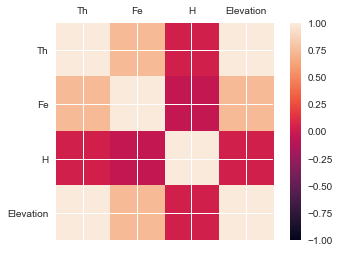

In [64]:
correlations = allTif.corr()

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)

ticks = numpy.arange(0,4,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(allTif.columns)
ax.set_yticklabels(allTif.columns)
plt.show()

In [65]:
print(correlations)

                 Th        Fe         H  Elevation
Th         1.000000  0.748271  0.039447   1.000000
Fe         0.748271  1.000000 -0.033953   0.748271
H          0.039447 -0.033953  1.000000   0.039447
Elevation  1.000000  0.748271  0.039447   1.000000
